# 1. Problem Statement

This project understands how the student's performance is affect by other variables such as gender, ethnicity, parent education level, lunch etc.

# 2. Data Collection

Data source : https://www.kaggle.com/datasets/desalegngeb/students-exam-scores



## 2.1 Import Data and Packages 

In [1]:
#import numpy, pandas, matplotlib, seaborn and warnings library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
#Read datast as pandas dataframe
df = pd.read_csv('../Data/Data.csv')

In [3]:
#Show top 5 records
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
#drop Unnamed: 0 column.
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
#shape of the dataset
df.shape

(30641, 14)

Dataset consist 30,641 rows and 14 columns.

## 2.2 Dataset informations.

In [6]:
#Show column names
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

Gender: Gender of the student (male/female)

EthnicGroup: Ethnic group of the student (group A to E)

ParentEduc: Parent(s) education background (from some_highschool to master's degree)

LunchType: School lunch type (standard or free/reduced)

TestPrep: Test preparation course followed (completed or none)

ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)

PracticeSport: How often the student parctice sport (never/sometimes/regularly))

IsFirstChild: If the child is first child in the family or not (yes/no)

NrSiblings: Number of siblings the student has (0 to 7)

TransportMeans: Means of transport to school (schoolbus/private)

WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)

MathScore: math test score(0-100)

ReadingScore: reading test score(0-100)

WritingScore: writing test score(0-100)

# 3. Checking the data.

## 3.1 Checking the data types

In [7]:
df.dtypes

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [8]:
all_col = list(df.columns)
num_col =list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print("All features :", all_col)
print("\n Object features :", cat_col)
print("\n Numerical features :", num_col)

All features : ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore']

 Object features : ['EthnicGroup', 'ParentEduc', 'ParentMaritalStatus', 'WklyStudyHours', 'TestPrep', 'IsFirstChild', 'PracticeSport', 'TransportMeans', 'LunchType', 'Gender']

 Numerical features : ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']


## 3.2 Checking for duplicate values.

In [9]:
df.duplicated().sum()

0

There are no duplicate values in that dataset.

## 3.3 Checking for missing values.

In [10]:
df.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [11]:
print("Before drop all columns which have missing values, We have ", df.shape[0], "rows. ")
print("If drop all columns which have missing values, We have ", df.dropna().shape[0], "rows. ")
print("If drop all columns which have missing values, We lose ", (df.shape[0] - df.dropna().shape[0]), "rows. ")
print("It is a ", ((df.shape[0] - df.dropna().shape[0])/ df.shape[0]) *100 , " % of the given dataset. ")

Before drop all columns which have missing values, We have  30641 rows. 
If drop all columns which have missing values, We have  19243 rows. 
If drop all columns which have missing values, We lose  11398 rows. 
It is a  37.19852485232205  % of the given dataset. 


In [12]:
df[df.isnull().any(axis = 1)]

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50
10,male,group C,associate's degree,standard,none,NaN,sometimes,yes,1.0,private,5 - 10,58,54,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30627,female,group A,high school,standard,completed,married,never,no,NaN,school_bus,> 10,58,77,82
30628,female,group B,NaN,free/reduced,none,single,sometimes,no,1.0,school_bus,5 - 10,55,63,63
30629,female,group D,associate's degree,standard,completed,married,sometimes,no,2.0,school_bus,NaN,67,63,72
30634,male,group A,associate's degree,free/reduced,completed,NaN,sometimes,no,2.0,school_bus,5 - 10,65,60,60


In [13]:
knni = KNNImputer(n_neighbors = 2, weights = "uniform")
knni.fit(df[num_col])

KNNImputer(n_neighbors=2)

In [14]:
temp = knni.transform(df[num_col])
temp1 = pd.DataFrame(data = temp, columns = num_col)

In [15]:
df.drop(columns = num_col, axis = 1, inplace = True)
df = pd.concat([df, temp1], axis = 1)

In [16]:
df[num_col].isnull().sum()

NrSiblings      0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

In [17]:
for i in cat_col:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [18]:
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
TransportMeans         0
WklyStudyHours         0
NrSiblings             0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [19]:
#check null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          30641 non-null  object 
 2   ParentEduc           30641 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             30641 non-null  object 
 5   ParentMaritalStatus  30641 non-null  object 
 6   PracticeSport        30641 non-null  object 
 7   IsFirstChild         30641 non-null  object 
 8   TransportMeans       30641 non-null  object 
 9   WklyStudyHours       30641 non-null  object 
 10  NrSiblings           30641 non-null  float64
 11  MathScore            30641 non-null  float64
 12  ReadingScore         30641 non-null  float64
 13  WritingScore         30641 non-null  float64
dtypes: float64(4), object(10)
memory usage: 3.3+ MB


## 3.4 Checking the unique values at each column.

In [20]:
df.nunique()

Gender                  2
EthnicGroup             5
ParentEduc              6
LunchType               2
TestPrep                2
ParentMaritalStatus     4
PracticeSport           3
IsFirstChild            2
TransportMeans          2
WklyStudyHours          3
NrSiblings             14
MathScore              95
ReadingScore           90
WritingScore           93
dtype: int64

In [21]:
for i in all_col:
    print(i ,'column :')
    print(df[i].unique())
    print()

Gender column :
['female' 'male']

EthnicGroup column :
['group C' 'group B' 'group A' 'group D' 'group E']

ParentEduc column :
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

LunchType column :
['standard' 'free/reduced']

TestPrep column :
['none' 'completed']

ParentMaritalStatus column :
['married' 'single' 'widowed' 'divorced']

PracticeSport column :
['regularly' 'sometimes' 'never']

IsFirstChild column :
['yes' 'no']

NrSiblings column :
[3.  0.  4.  1.  2.  5.  3.5 1.5 0.5 7.  6.  2.5 4.5 5.5]

TransportMeans column :
['school_bus' 'private']

WklyStudyHours column :
['< 5' '5 - 10' '> 10']

MathScore column :
[ 71.  69.  87.  45.  76.  73.  85.  41.  65.  37.  58.  40.  66.  80.
  48.  88.  18.  46.  50.  42.  74.  75.  70.  63.  56.  97.  81.  51.
  77.  53.  59.  60.  67.  82.  54.  33.  84.  52.  61.   0.  39.  62.
  64.  47.  44.  28.  49.  57.  27.  68.  79. 100.  72.  98.  55.  90.
  86.  89.  21.  96.  91.

## 3.5 Check the statics of the dataset

In [22]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,2.143321,66.558402,69.377533,68.418622
std,1.439867,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


## 3.6 Add avarage column

In [23]:
df['Average'] = ((df['MathScore'] + df['ReadingScore'] + df['WritingScore']) / 3)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours,NrSiblings,MathScore,ReadingScore,WritingScore,Average
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,school_bus,< 5,3.0,71.0,71.0,74.0,72.000000
1,female,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10,0.0,69.0,90.0,88.0,82.333333
2,female,group B,master's degree,standard,none,single,sometimes,yes,school_bus,< 5,4.0,87.0,93.0,91.0,90.333333
3,male,group A,associate's degree,free/reduced,none,married,never,no,school_bus,5 - 10,1.0,45.0,56.0,42.0,47.666667
4,male,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10,0.0,76.0,78.0,75.0,76.333333


# 4. Exploring data

In [24]:
all_col = list(df.columns)
num_col =list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

In [25]:
print("Number of students with full marks in maths :", df[df['MathScore'] == 100]['Average'].count())
print("Number of students with full marks in writing :",df[df['WritingScore'] == 100]['Average'].count())
print("Number of students with full marks in reading :",df[df['ReadingScore'] == 100]['Average'].count())

Number of students with full marks in maths : 275
Number of students with full marks in writing : 484
Number of students with full marks in reading : 344


In [26]:
print("Number of students with minimum marks in maths :",df[df['MathScore'] == 0]['Average'].count())
print("Number of students with full marks in writing :", df[df['WritingScore'] == 0]['Average'].count())
print("Number of students with full marks in reading :",df[df['ReadingScore'] == 0]['Average'].count())

Number of students with minimum marks in maths : 1
Number of students with full marks in writing : 0
Number of students with full marks in reading : 0


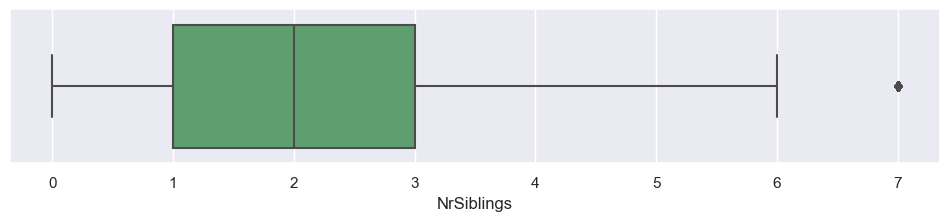

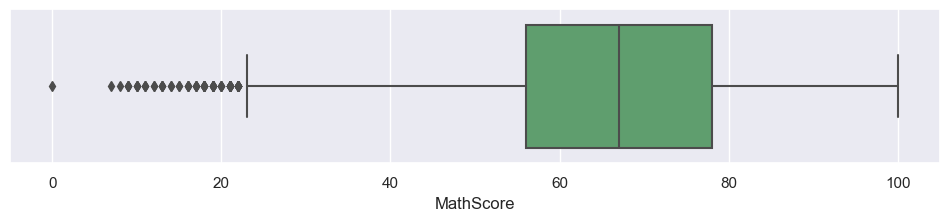

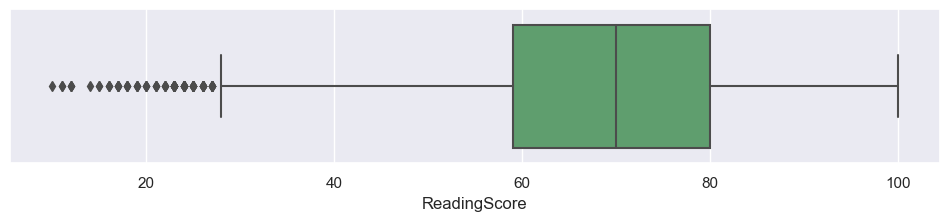

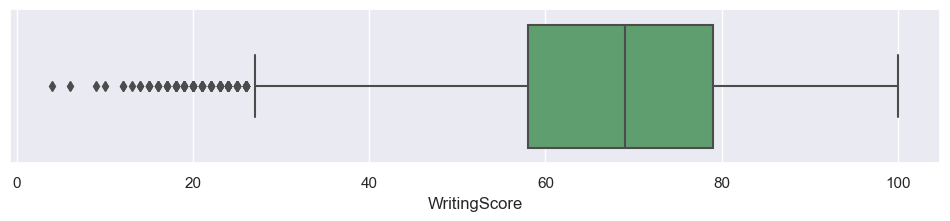

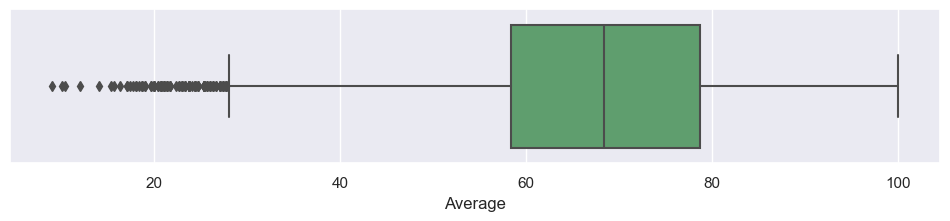

In [27]:
for i in num_col:
    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(data = df, x = i, color = 'g')
    plt.show()

In [28]:
for i in num_col:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - (1.5 * IQR)
    upper = q3 + (1.5 * IQR)
    df.loc[df[i] < lower, i] = lower
    df.loc[df[i] > upper, i] = upper

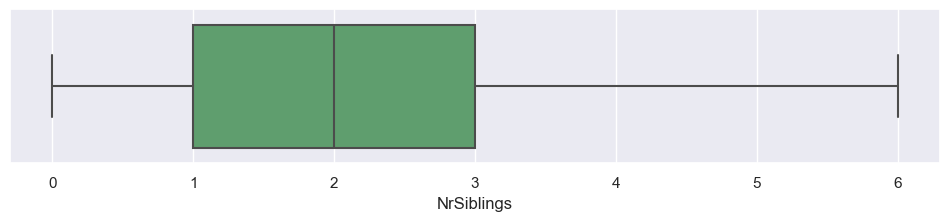

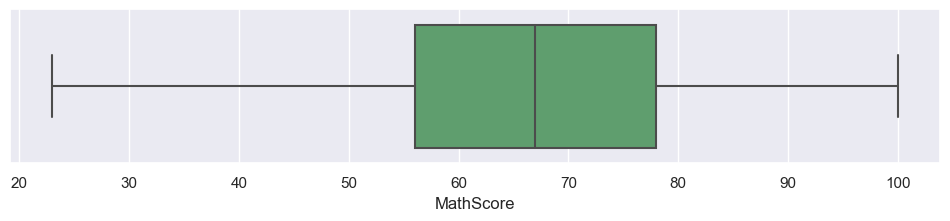

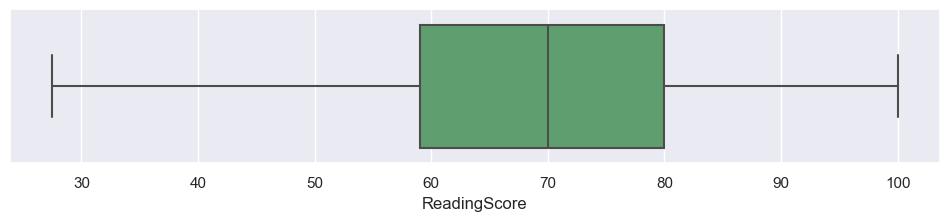

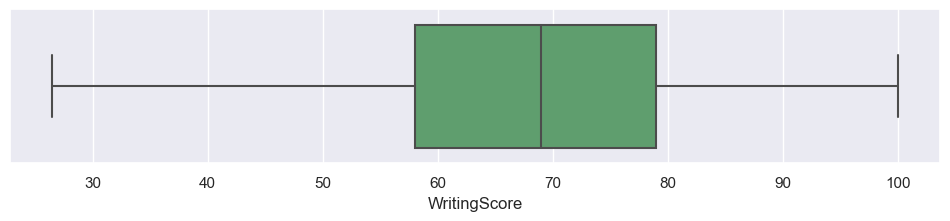

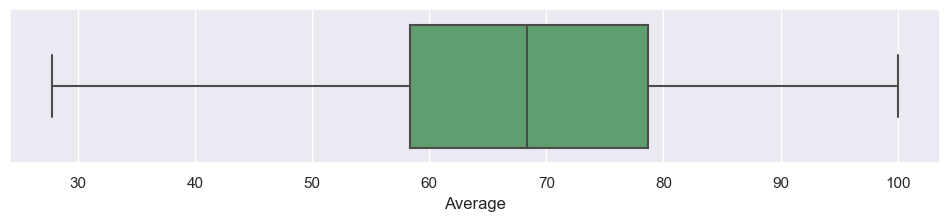

In [29]:


for i in num_col:
    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(data = df, x = i, color = 'g')
    plt.show()

group C    36.069319
group D    24.486799
group B    19.013740
group E    13.188212
group A     7.241931
Name: EthnicGroup, dtype: float64


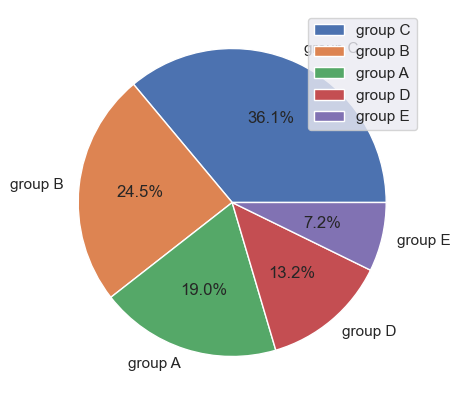

some college          27.668810
high school           18.560099
associate's degree    18.112986
some high school      18.005287
bachelor's degree     11.050553
master's degree        6.602265
Name: ParentEduc, dtype: float64


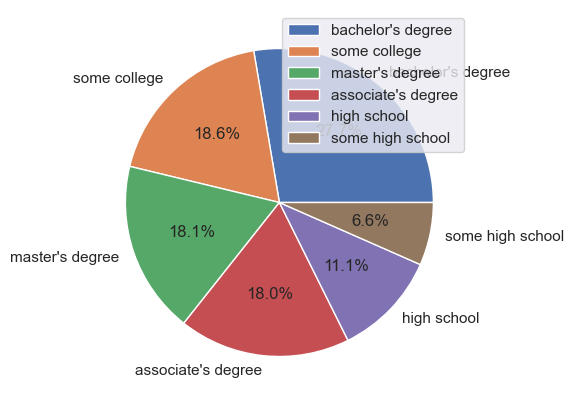

married     58.855781
single      23.161777
divorced    16.053654
widowed      1.928788
Name: ParentMaritalStatus, dtype: float64


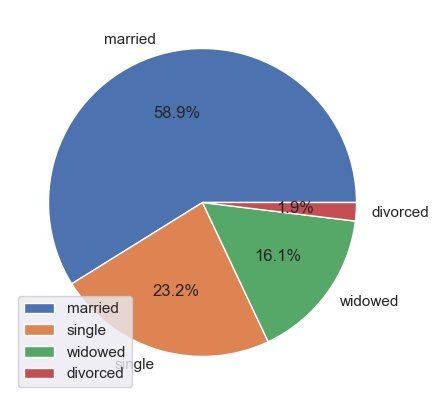

5 - 10    56.137202
< 5       26.885546
> 10      16.977253
Name: WklyStudyHours, dtype: float64


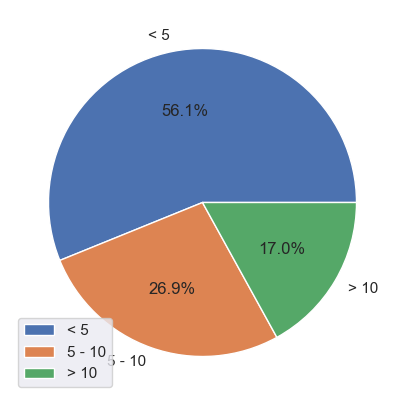

none         67.510851
completed    32.489149
Name: TestPrep, dtype: float64


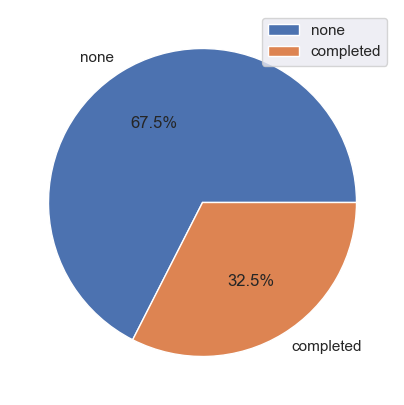

yes    65.226331
no     34.773669
Name: IsFirstChild, dtype: float64


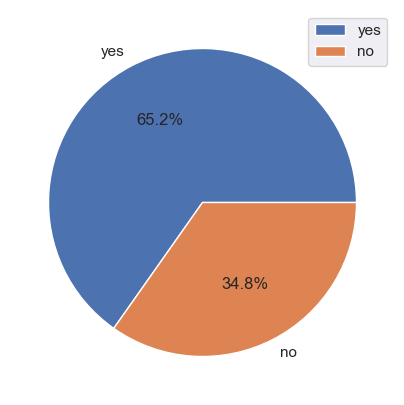

sometimes    51.708495
regularly    35.224046
never        13.067459
Name: PracticeSport, dtype: float64


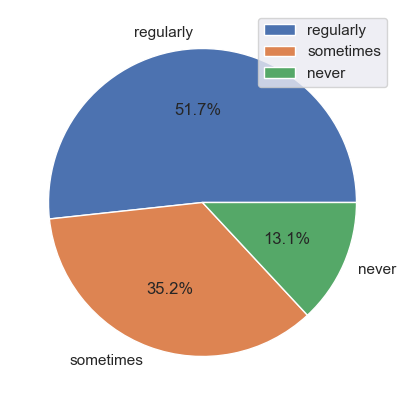

school_bus    62.918965
private       37.081035
Name: TransportMeans, dtype: float64


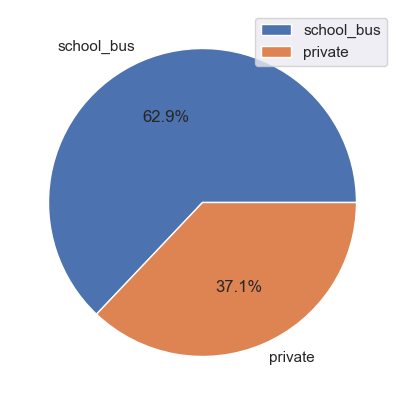

standard        64.961979
free/reduced    35.038021
Name: LunchType, dtype: float64


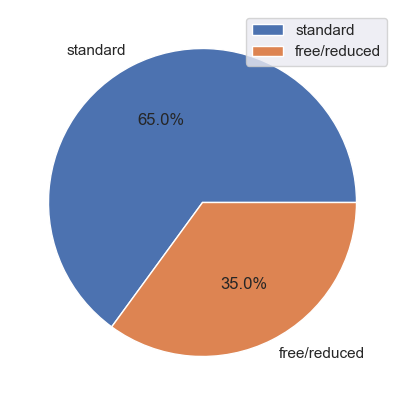

female    50.337783
male      49.662217
Name: Gender, dtype: float64


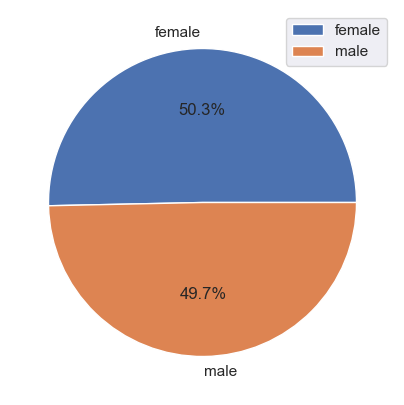

In [30]:
for i in cat_col:
    x = df[i].value_counts(normalize = True)
    labels = df[i].unique()
    print(x * 100)
    
    sns.set()
    plt.figure(figsize = (5, 5))
    plt.pie(x = x, labels = labels, autopct = '%1.1f%%')
    plt.legend()
    plt.show()

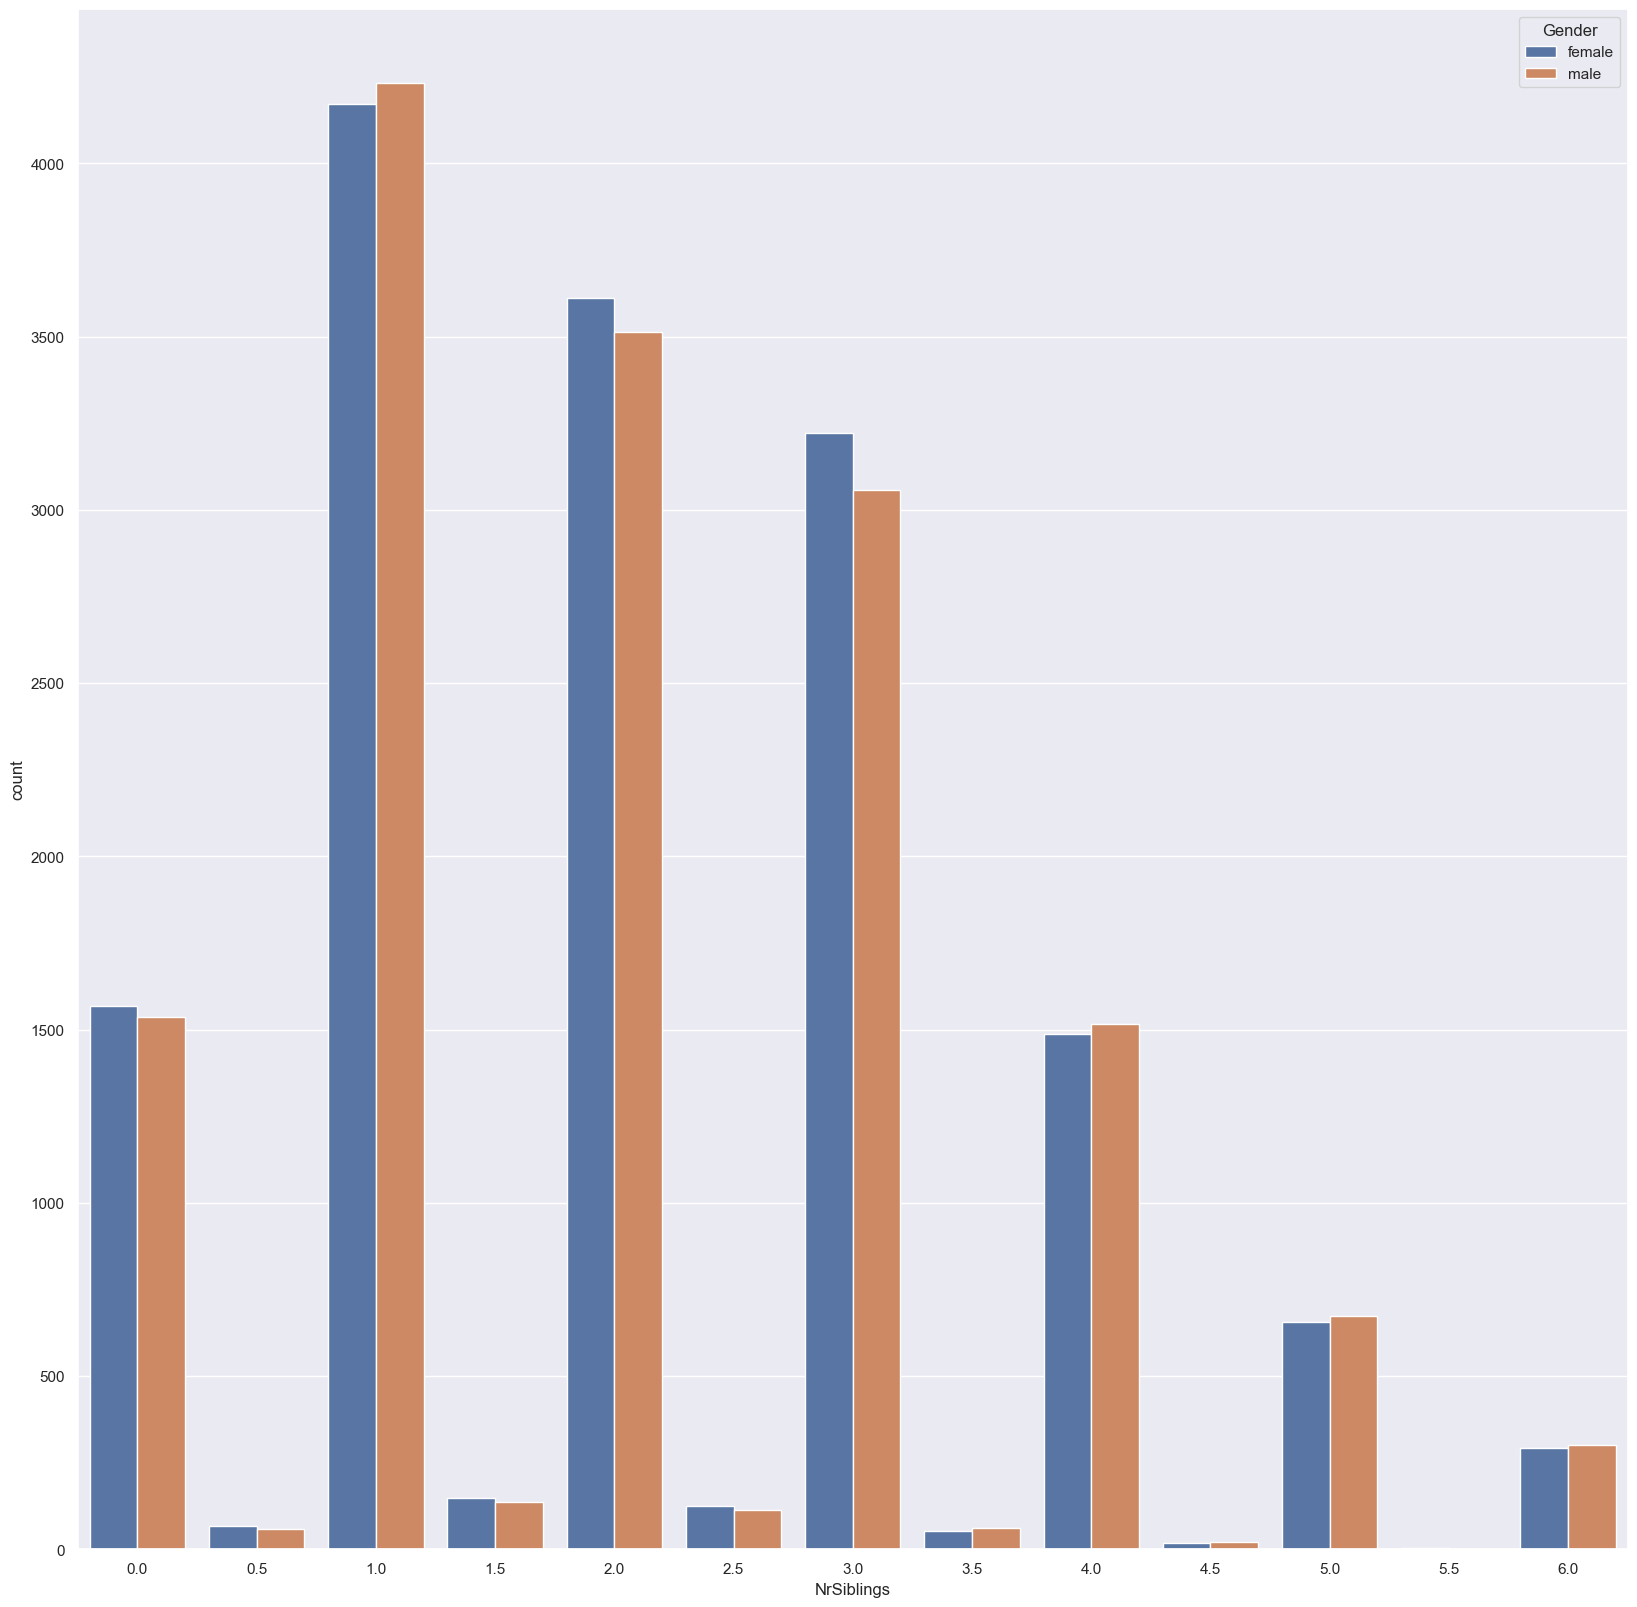

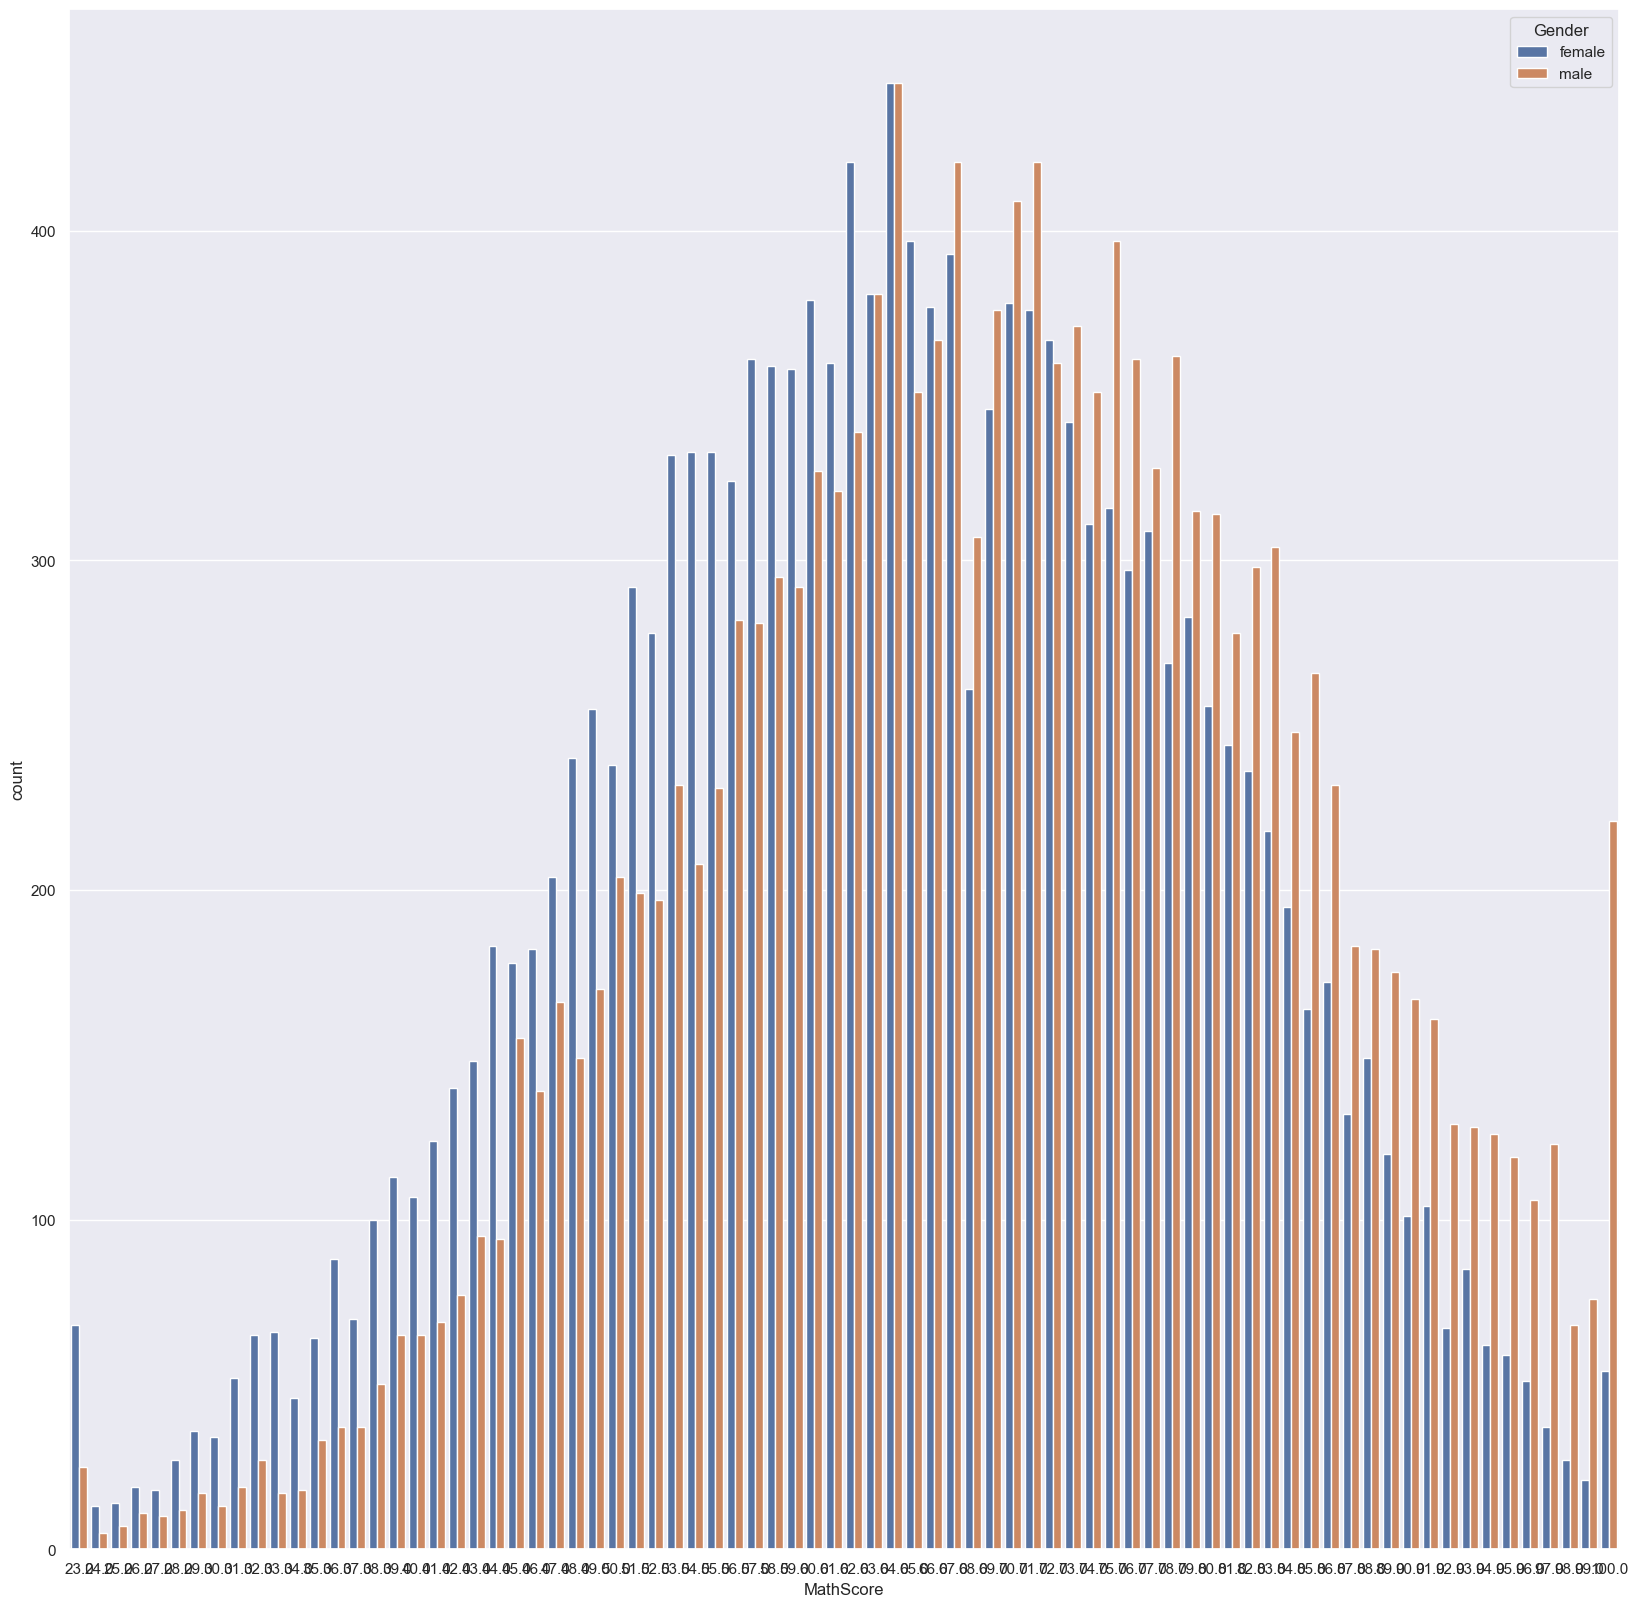

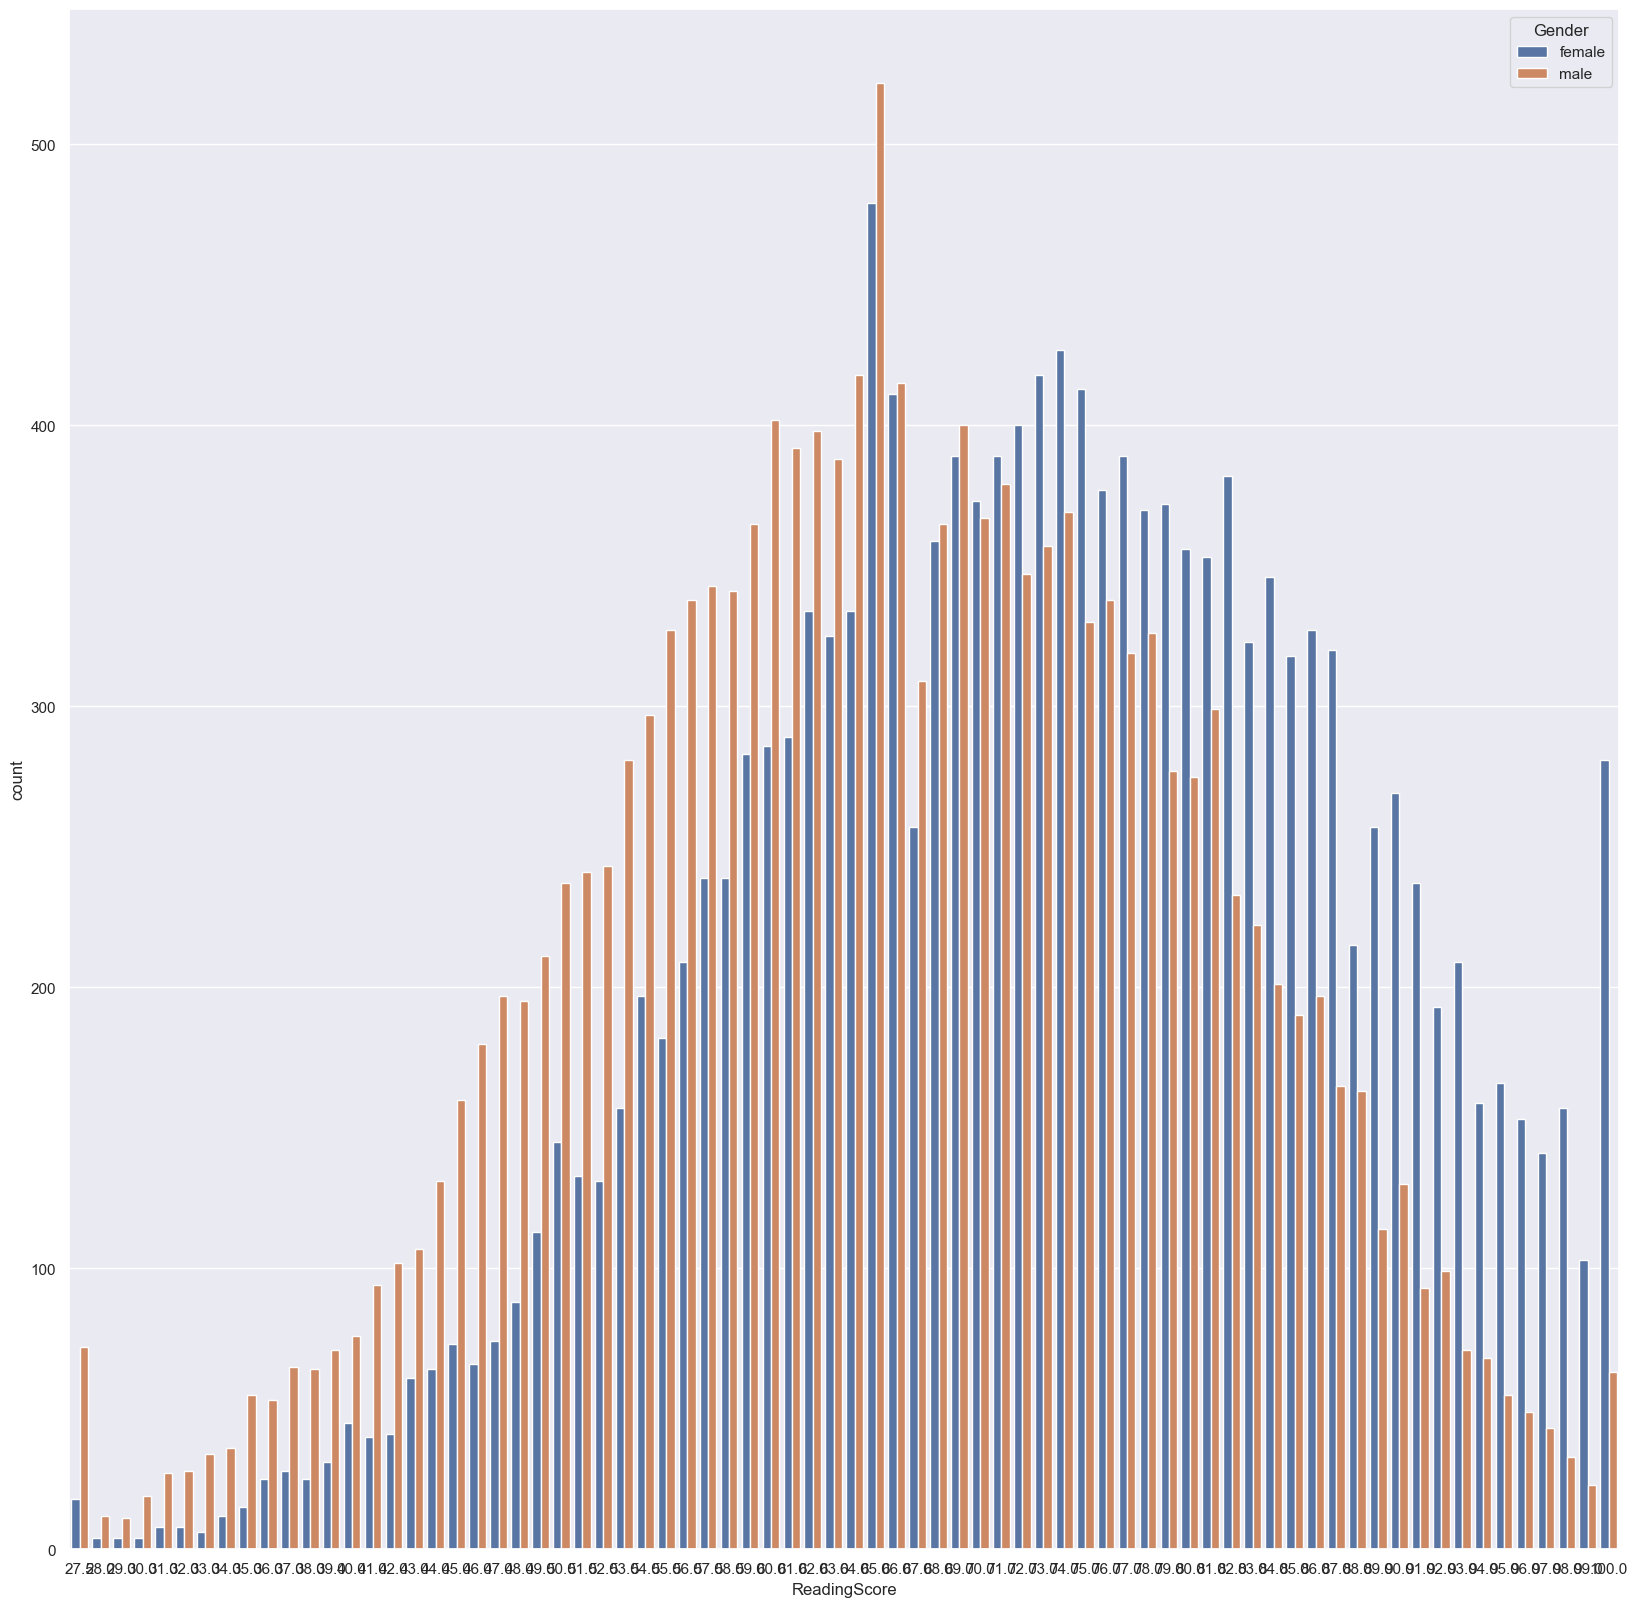

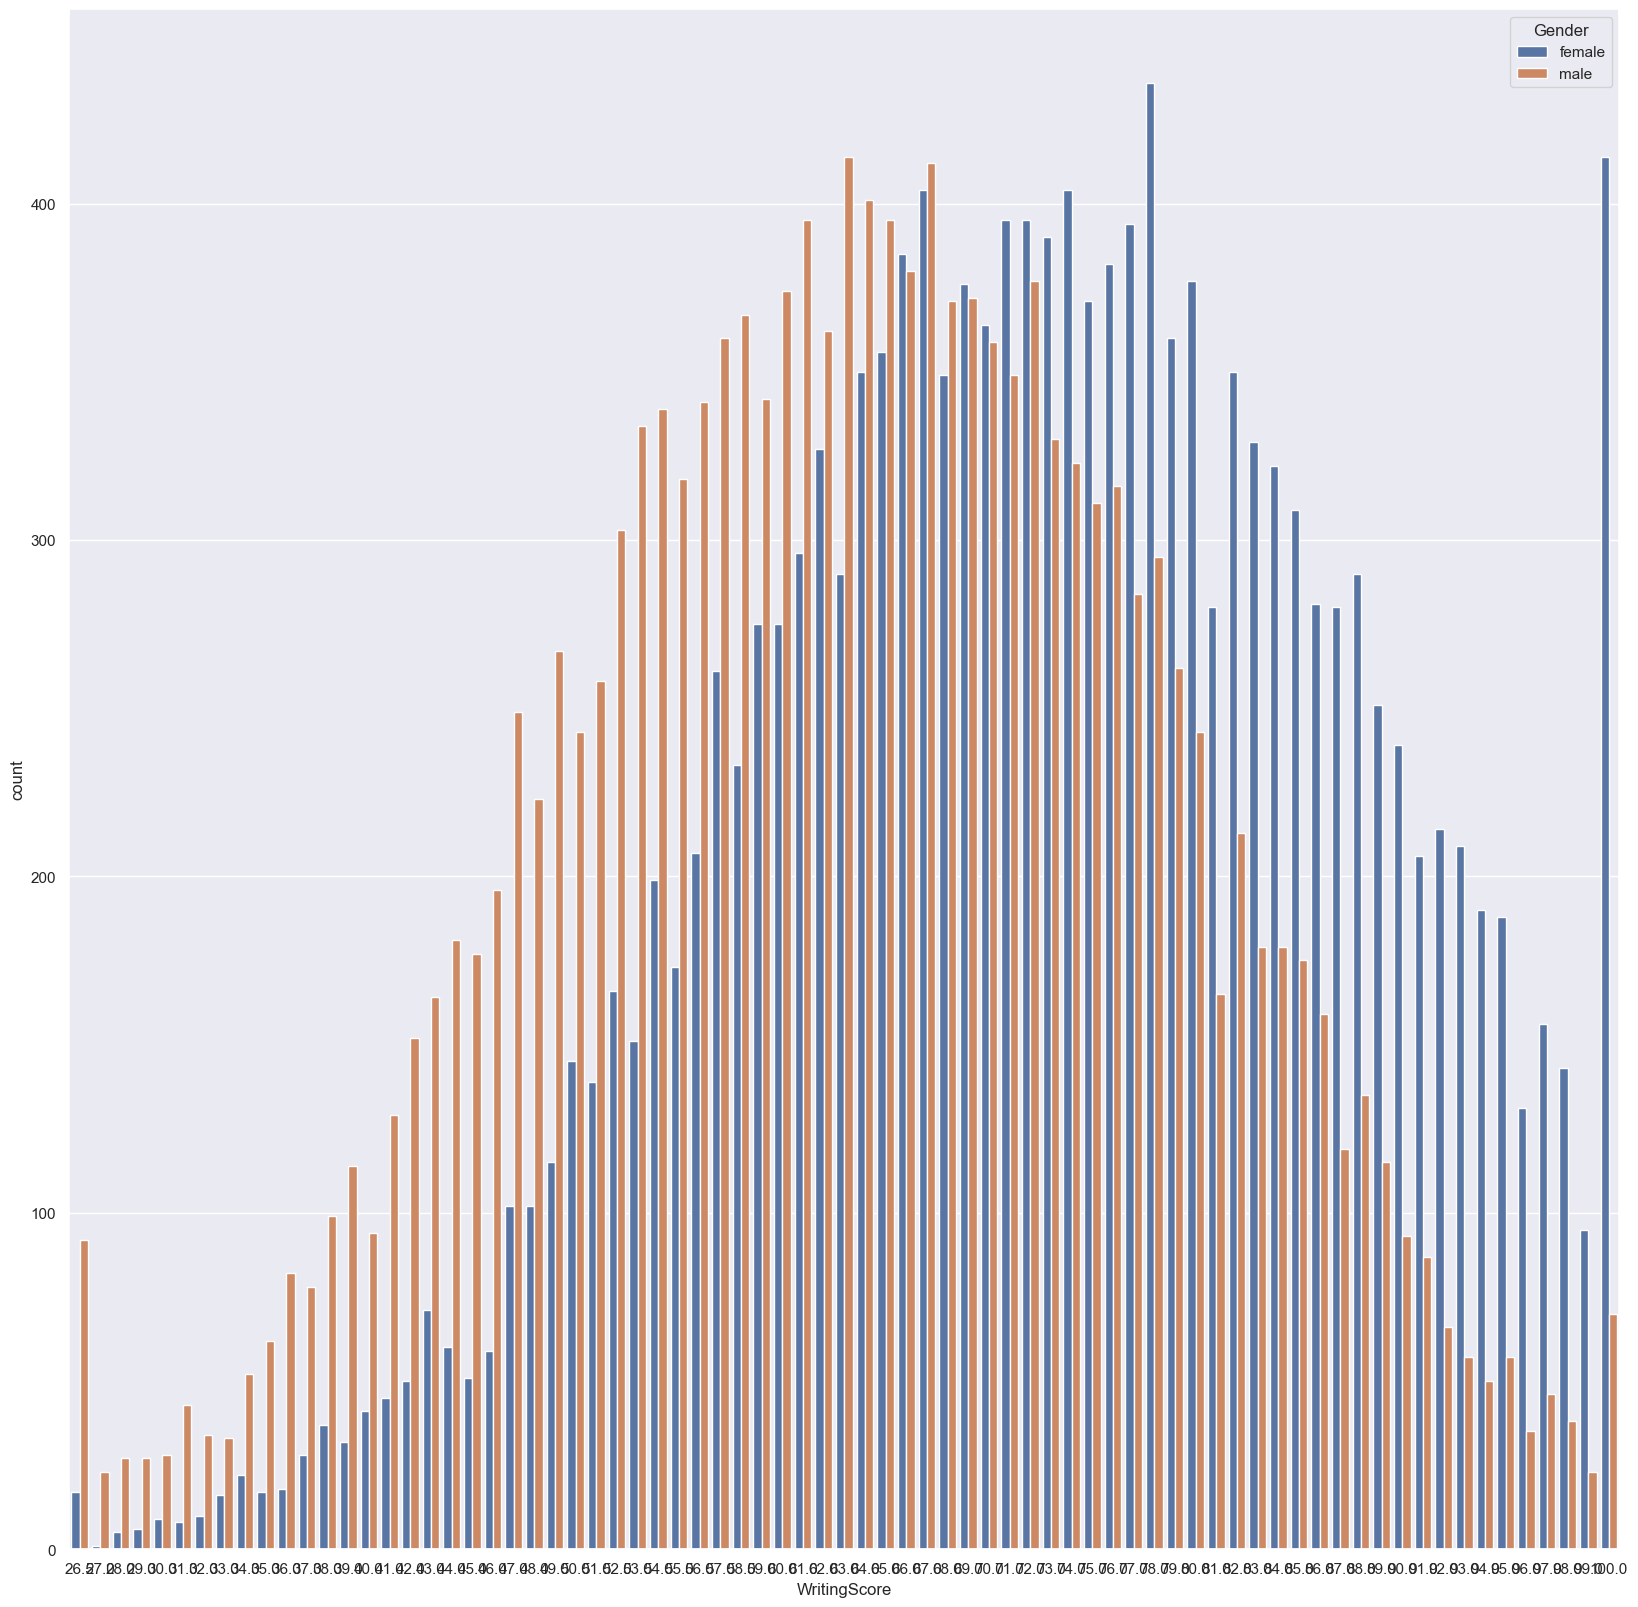

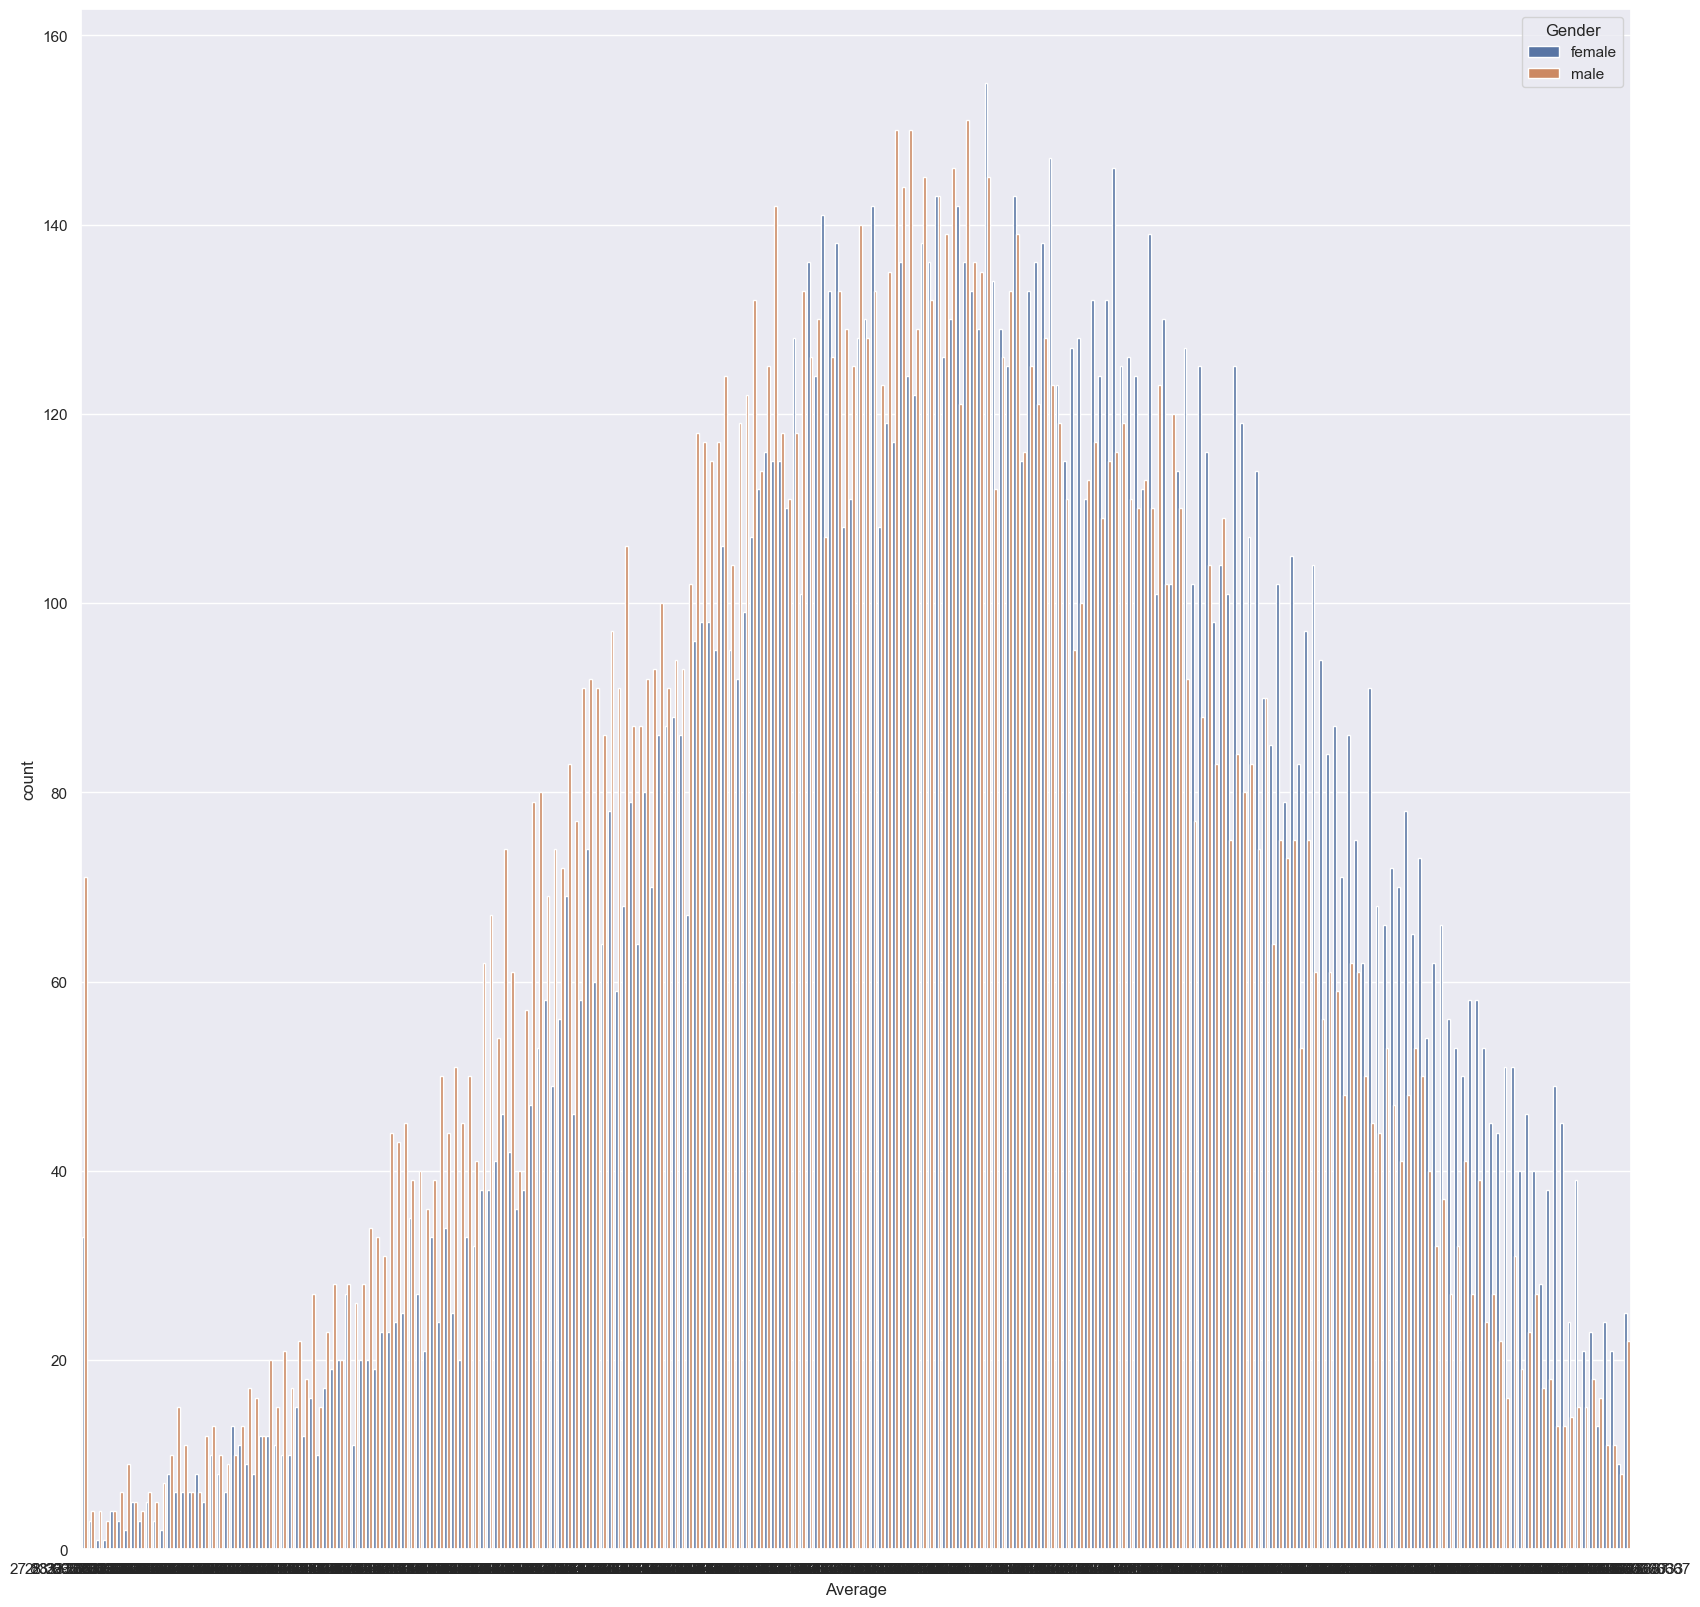

In [51]:
for i in num_col:
    sns.set()
    plt.figure(figsize = (20, 20))
    sns.countplot(data = df, x = i, hue = 'Gender')
    plt.show()b

In [31]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours,NrSiblings,MathScore,ReadingScore,WritingScore,Average
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,school_bus,< 5,3.0,71.0,71.0,74.0,72.000000
1,female,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10,0.0,69.0,90.0,88.0,82.333333
2,female,group B,master's degree,standard,none,single,sometimes,yes,school_bus,< 5,4.0,87.0,93.0,91.0,90.333333
3,male,group A,associate's degree,free/reduced,none,married,never,no,school_bus,5 - 10,1.0,45.0,56.0,42.0,47.666667
4,male,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10,0.0,76.0,78.0,75.0,76.333333


In [32]:
df.to_csv('../Data/CleanedData.csv')